In [1]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt

%matplotlib inline
# read in the csv files
df = pd.read_csv('Desktop/311_Service_Requests_from_2010_to_Present.csv')


C:\Users\farah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
Unique Key                        300698 non-null int64
Created Date                      300698 non-null object
Closed Date                       298534 non-null object
Agency                            300698 non-null object
Agency Name                       300698 non-null object
Complaint Type                    300698 non-null object
Descriptor                        294784 non-null object
Location Type                     300567 non-null object
Incident Zip                      298083 non-null float64
Incident Address                  256288 non-null object
Street Name                       256288 non-null object
Cross Street 1                    251419 non-null object
Cross Street 2                    250919 non-null object
Intersection Street 1             43858 non-null object
Intersection Street 2             43362 non-null object
Address Type                      29

In [9]:
#convert columnd to datetime
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
Unique Key                        300698 non-null int64
Created Date                      300698 non-null datetime64[ns]
Closed Date                       298534 non-null datetime64[ns]
Agency                            300698 non-null object
Agency Name                       300698 non-null object
Complaint Type                    300698 non-null object
Descriptor                        294784 non-null object
Location Type                     300567 non-null object
Incident Zip                      298083 non-null float64
Incident Address                  256288 non-null object
Street Name                       256288 non-null object
Cross Street 1                    251419 non-null object
Cross Street 2                    250919 non-null object
Intersection Street 1             43858 non-null object
Intersection Street 2             43362 non-null object
Address Type        

In [11]:
#drop useless columns which are include huge rate of Null values
df = df.drop(['School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location' ,
             'Bridge Highway Name','Bridge Highway Direction','Road Ramp','Bridge Highway Segment'
             ,'Garage Lot Name','Ferry Direction','Ferry Terminal Name'], axis=1)

In [12]:
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,40.912869,-73.700760


In [13]:
#Dsplay all columns
pd.set_option('display.max_columns', None)
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [14]:
df1=df.copy()

In [15]:
df['new_date'] = [d.date() for d in df['Closed Date']]


In [139]:
df1['year_Request_Closing_Time'] = df1['Closed Date'].dt.year

In [140]:
df1['month_Request_Closing_Time'] = df1['Closed Date'].dt.month

In [141]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 46 columns):
Unique_Key                        300698 non-null int64
Created Date                      300698 non-null datetime64[ns]
Closed Date                       298534 non-null datetime64[ns]
Agency                            300698 non-null object
Agency_Name                       300698 non-null object
Complaint_Type                    300698 non-null object
Descriptor                        294784 non-null object
Location_Type                     300567 non-null object
Incident Zip                      298083 non-null float64
Incident Address                  256288 non-null object
Street Name                       256288 non-null object
Cross Street 1                    251419 non-null object
Cross Street 2                    250919 non-null object
Intersection Street 1             43858 non-null object
Intersection Street 2             43362 non-null object
Address Type        

In [16]:
#df1['Dates'] = pd.to_datetime(df1['Closed Date']).dt.date
#df1['Request_Closing_Time'] = pd.to_datetime(df1['Closed Date']).dt.time

In [17]:
df1['hour_Request_Closing_Time'] = df1['Closed Date'].dt.hour

In [18]:
df1['minute_Request_Closing_Time'] = df1['Closed Date'].dt.minute

In [20]:
#drop useless columns which are include huge rate of Null values
#df1 = df1.drop(['second_Request_Closing_Time'], axis=1)

In [21]:
df1.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,hour_Request_Closing_Time,minute_Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0.0,55.0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",1.0,26.0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",4.0,51.0
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",7.0,43.0
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",3.0,24.0


In [22]:
df1.rename(columns={'Unique Key': 'Unique_Key', 'Agency Name': 'Agency_Name', 'Complaint Type': 'Complaint_Type', 'Location Type': 'Location_Type'}, inplace=True)


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 44 columns):
Unique_Key                        300698 non-null int64
Created Date                      300698 non-null datetime64[ns]
Closed Date                       298534 non-null datetime64[ns]
Agency                            300698 non-null object
Agency_Name                       300698 non-null object
Complaint_Type                    300698 non-null object
Descriptor                        294784 non-null object
Location_Type                     300567 non-null object
Incident Zip                      298083 non-null float64
Incident Address                  256288 non-null object
Street Name                       256288 non-null object
Cross Street 1                    251419 non-null object
Cross Street 2                    250919 non-null object
Intersection Street 1             43858 non-null object
Intersection Street 2             43362 non-null object
Address Type        

In [25]:
df1['Agency_Name'].unique()

array(['New York City Police Department', 'NYPD',
       'Internal Affairs Bureau'], dtype=object)

In [26]:
df1['Descriptor'].unique()

array(['Loud Music/Party', 'No Access', 'Commercial Overnight Parking',
       'Blocked Sidewalk', 'Posted Parking Sign Violation',
       'Blocked Hydrant', 'With License Plate', 'Partial Access',
       'Unauthorized Bus Layover', 'Double Parked Blocking Vehicle',
       'Double Parked Blocking Traffic', 'Vehicle', 'Loud Talking',
       'Banging/Pounding', 'Car/Truck Music', 'Tortured',
       'In Prohibited Area', 'Congestion/Gridlock', 'Neglected',
       'Car/Truck Horn', 'In Public', 'Other (complaint details)', nan,
       'No Shelter', 'Truck Route Violation', 'Unlicensed',
       'Overnight Commercial Storage', 'Engine Idling',
       'After Hours - Licensed Est', 'Detached Trailer',
       'Underage - Licensed Est', 'Chronic Stoplight Violation',
       'Loud Television', 'Chained', 'Building', 'In Car',
       'Police Report Requested', 'Chronic Speeding',
       'Playing in Unsuitable Place', 'Drag Racing',
       'Police Report Not Requested', 'Nuisance/Truant', 'Homeless

In [170]:
df1['Complaint_Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [157]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 46 columns):
Unique_Key                        300698 non-null int64
Created Date                      300698 non-null datetime64[ns]
Closed Date                       298534 non-null datetime64[ns]
Agency                            300698 non-null object
Agency_Name                       300698 non-null object
Complaint_Type                    300698 non-null object
Descriptor                        294784 non-null object
Location_Type                     300567 non-null object
Incident Zip                      298083 non-null float64
Incident Address                  256288 non-null object
Street Name                       256288 non-null object
Cross Street 1                    251419 non-null object
Cross Street 2                    250919 non-null object
Intersection Street 1             43858 non-null object
Intersection Street 2             43362 non-null object
Address Type        

In [27]:
df1['Unique_Key'].nunique()

300698

In [188]:
P_MIN =df1.minute_Request_Closing_Time.mean()
P_MIN

29.10856049897164

In [161]:
p_hour = df1.hour_Request_Closing_Time.mean()
p_hour

12.146576269369653

In [165]:
p_month = df1.month_Request_Closing_Time.mean()
p_month

7.93286526827765

In [180]:
p_year = df1.year_Request_Closing_Time.mean()


In [169]:
n_Descriptor = df1.query('Descriptor == "Loud Music/Party"').shape[0]
n_Descriptor

61430

In [172]:
n_Complaint_Type = df1.query('Complaint_Type== "Noise - Street/Sidewalk"').shape[0]
n_Complaint_Type

48612

In [194]:
#n_Descriptor_Loud= np.random.choice([1,0], size=n_Descriptor, p=[p_year, (1-p_year)])

In [72]:
result = df1.groupby(["Complaint_Type"])['hour_Request_Closing_Time'].aggregate(np.median).reset_index().sort_values('Complaint_Type')


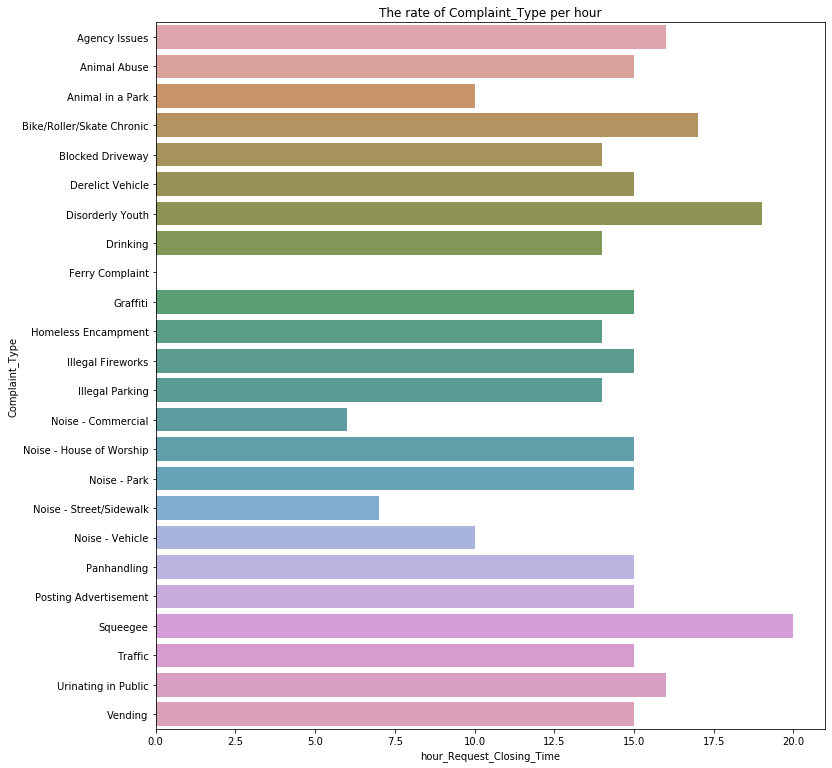

In [101]:
sns.barplot(y='Complaint_Type', x='hour_Request_Closing_Time' ,data=result, saturation=.5).set_title('The rate of Complaint_Type per hour');
plt.rcParams['figure.figsize']=(12,13)



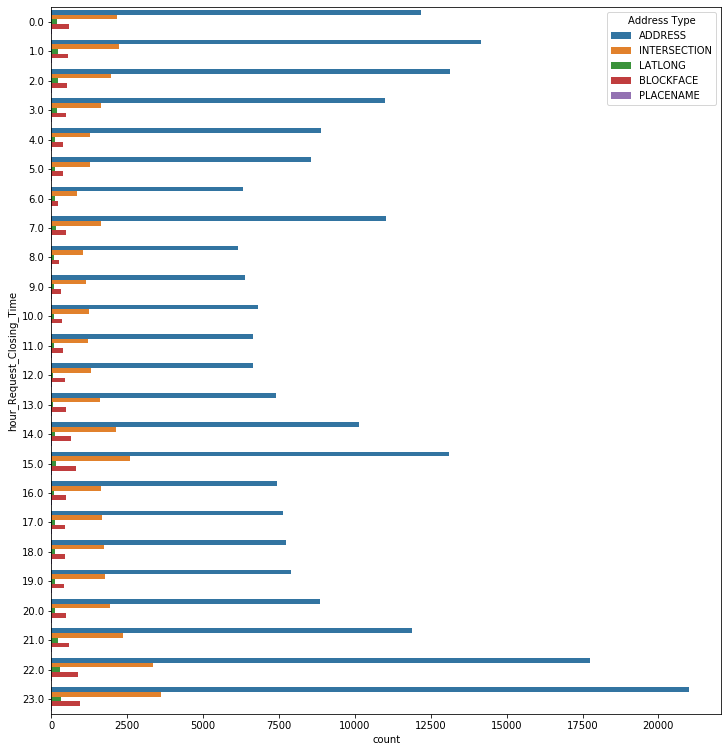

In [109]:
sns.countplot(y ='hour_Request_Closing_Time', hue = "Address Type", data = df1)
plt.rcParams['figure.figsize']=(12,13)


In [154]:
rate_Request_Closing_Time_in_month =df1.groupby('month_Request_Closing_Time').sum()
rate_Request_Closing_Time_in_month.sort_values(by ='hour_Request_Closing_Time',ascending=True)


,Unique_Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,hour_Request_Closing_Time,minute_Request_Closing_Time,year_Request_Closing_Time
month_Request_Closing_Time,,,,,,,,,
1.0,4070795209,1340229.0,1.239863e+08,2.541449e+07,5.010250e+03,-9.091444e+03,471.0,3472.0,254016.0
3.0,69250613118,24847405.0,2.285794e+09,4.584043e+08,9.255694e+04,-1.680266e+05,30628.0,69120.0,4606290.0
4.0,824253541601,292971757.0,2.707925e+10,5.489842e+09,1.097961e+06,-1.993077e+06,335692.0,787511.0,54610530.0
11.0,980506175616,332888576.0,3.067676e+10,6.159862e+09,1.243958e+06,-2.258428e+06,369528.0,893975.0,61759750.0
12.0,979779789018,330642282.0,3.046233e+10,6.113049e+09,1.234832e+06,-2.241830e+06,370708.0,901395.0,61300330.0
10.0,1027532317488,350804823.0,3.236849e+10,6.534947e+09,1.312347e+06,-2.382378e+06,391241.0,943850.0,65169130.0
7.0,1069943952564,372267730.0,3.444315e+10,7.048681e+09,1.394733e+06,-2.531235e+06,412565.0,994434.0,69348240.0
8.0,1090894417955,376238696.0,3.477119e+10,7.104118e+09,1.408622e+06,-2.556574e+06,416568.0,1013369.0,70176405.0
9.0,1110651869776,381468844.0,3.519358e+10,7.127433e+09,1.426721e+06,-2.589871e+06,427330.0,1027592.0,70948150.0


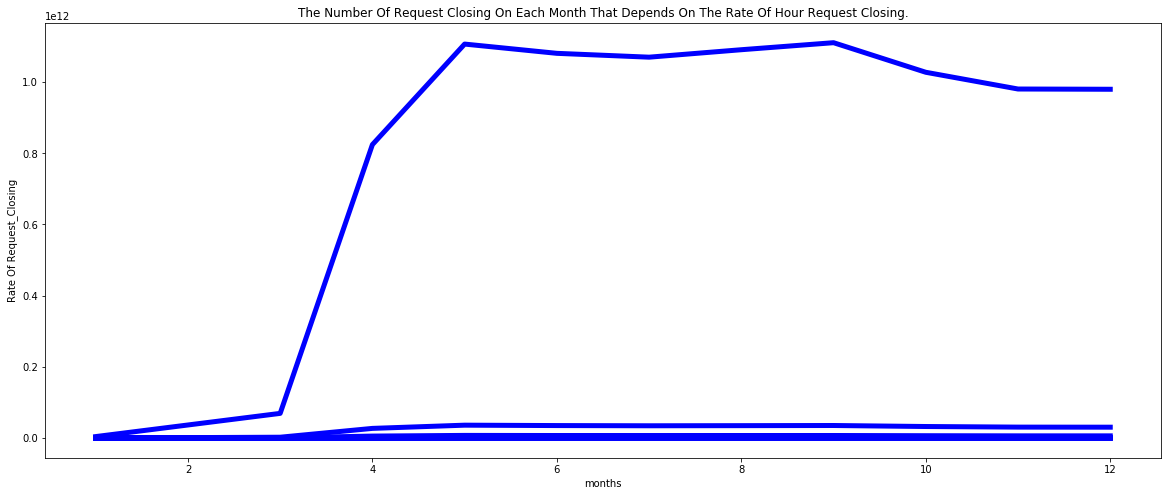

In [155]:
plt.figure(figsize=(20,8))
plt.plot(rate_Request_Closing_Time_in_month, color='blue',linewidth=5)
plt.xlabel('months')
plt.ylabel('Rate Of Request_Closing')
plt.title('The Number Of Request Closing On Each Month That Depends On The Rate Of Hour Request Closing.')
plt.show;

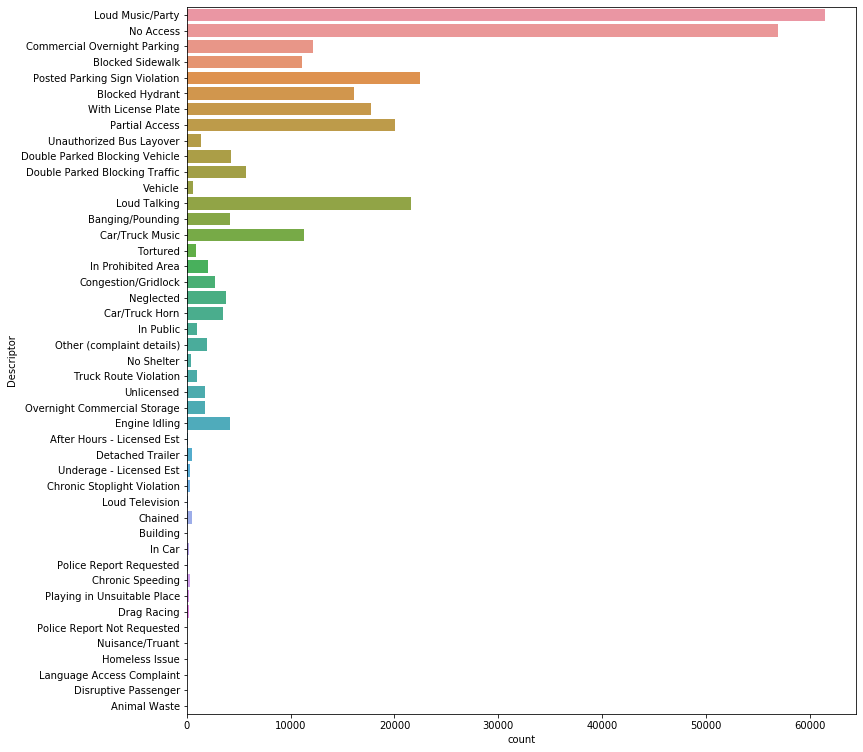

In [119]:
#sns.countplot(df1['Descriptor'])
#plt.title('Number of events In Transcripts')
#plt.rcParams['figure.figsize']=(12,13)


sns.countplot(y ='Descriptor', data = df1)
plt.rcParams['figure.figsize']=(12,13)


plt.show();